# Hierarchical Clustering Algorithm

## 1. Introduction
Hierarchical clustering is an unsupervised learning algorithm used to group similar data points into clusters. Unlike K-Means, which requires the number of clusters to be specified beforehand, hierarchical clustering builds a hierarchy of clusters either by merging (agglomerative) or splitting (divisive) them.

### Types of Hierarchical Clustering:
- **Agglomerative**: Starts with individual points and merges them into clusters.
- **Divisive**: Starts with all points in one cluster and splits them into smaller clusters.

### Applications
- Customer segmentation
- Gene sequencing analysis
- Social network analysis

## 2. Mathematical Foundations
Hierarchical clustering is based on the concept of proximity between data points. It uses distance metrics like Euclidean, Manhattan, or cosine distance to calculate how close or far apart points are.

### Agglomerative Clustering Steps:
1. Start with each data point as a separate cluster.
2. Merge the closest clusters based on a distance metric (e.g., Euclidean distance).
3. Repeat until all points are merged into a single cluster or the desired number of clusters is reached.

### Linkage Criteria:
- **Single linkage**: Minimum distance between points in two clusters.
- **Complete linkage**: Maximum distance between points in two clusters.
- **Average linkage**: Average distance between points in two clusters.
- **Ward's method**: Minimizes the variance within clusters.

In [4]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## 3. Data Generation and Visualization

We'll generate some sample data using `make_blobs`, similar to the K-Means example, and visualize it in 2D space.

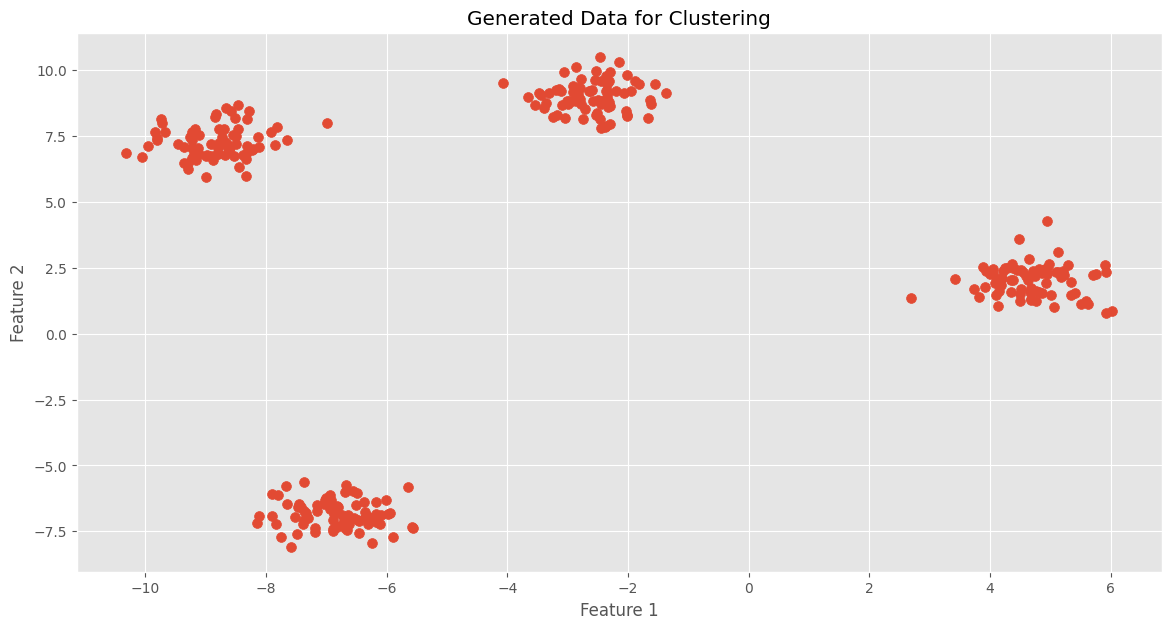

In [8]:
# Generating sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Visualizing the dataset
plt.figure(figsize=(14, 7))
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Generated Data for Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 4. Implementing Agglomerative Hierarchical Clustering

Now, we'll apply **Agglomerative Clustering** using the `AgglomerativeClustering` class from `sklearn`. We'll set the number of clusters to 4.

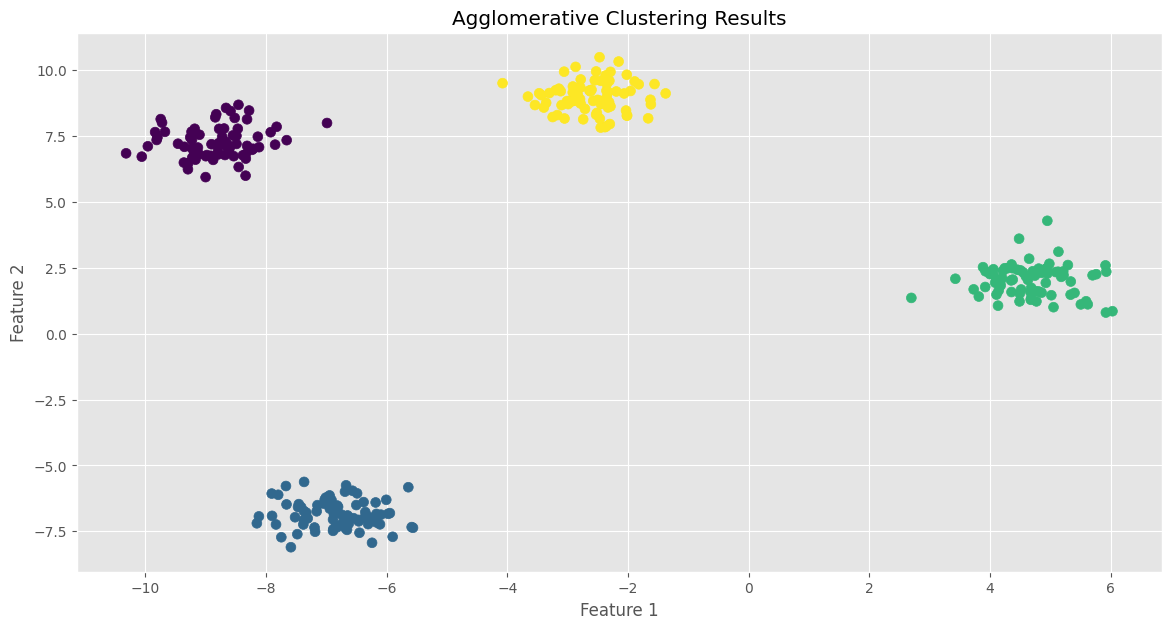

In [9]:
# Applying Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_agg = agg_cluster.fit_predict(X)

# Visualizing the clustered data
plt.figure(figsize=(14, 7))
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1], c=y_agg, cmap='viridis', s=50)
plt.title('Agglomerative Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 5. Dendrogram for Hierarchical Clustering

A dendrogram helps visualize how clusters are merged or split at each step of the hierarchical process. It provides a tree-like structure that reveals the relationships between clusters.

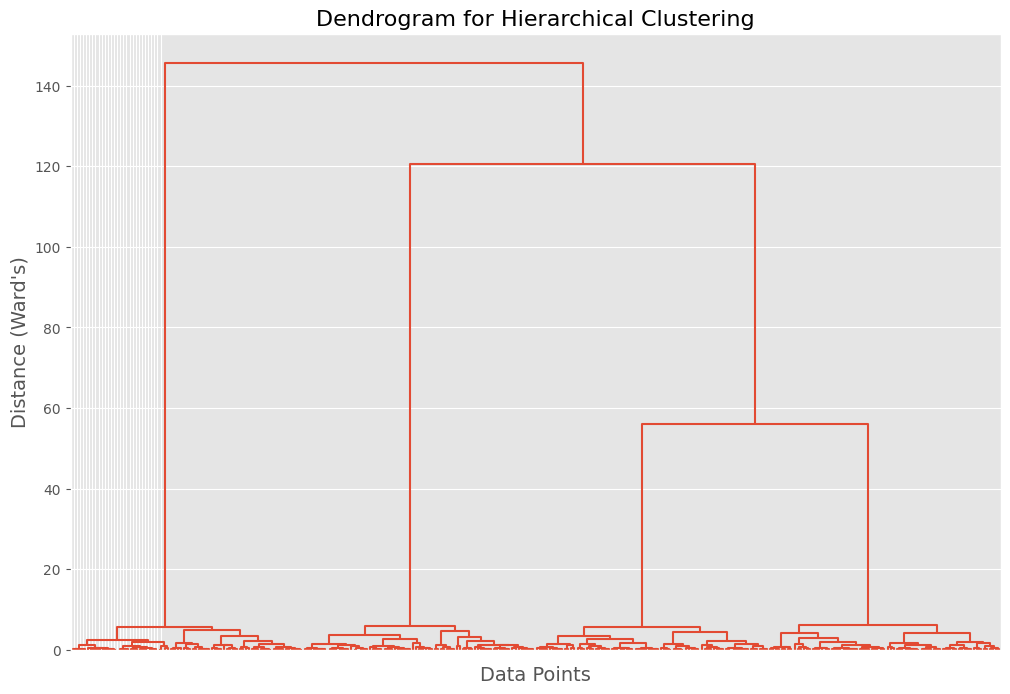

In [11]:
# Creating the linkage matrix for dendrogram
Z = linkage(X, method='ward')

# Plotting the dendrogram with improvements
plt.figure(figsize=(12, 8))  # Increase figure size

# Plot dendrogram with fewer x-ticks for clarity
dendrogram(Z, leaf_rotation=90, leaf_font_size=10, color_threshold=0)  # Show all links with default colors
plt.title('Dendrogram for Hierarchical Clustering', fontsize=16)
plt.xlabel('Data Points', fontsize=14)
plt.ylabel('Distance (Ward\'s)', fontsize=14)

# Adjust x-ticks to show fewer labels
plt.xticks(ticks=np.arange(0, len(X), step=10), fontsize=10)  # Adjust step size as needed

plt.grid(True)  # Add a grid for better readability
plt.show()

## 6. Conclusion

Hierarchical clustering is a powerful tool for exploring data relationships and cluster structures. Unlike K-Means, it doesn't require the number of clusters to be specified beforehand, and the dendrogram provides a visual representation of the clustering hierarchy. However, it can be computationally expensive for large datasets.